Name: 			           Atharva Pravin Navghane

Registration Number: 	 21BCE0083

Email ID: 			       atharvapravin.n2021@vitstudent.ac.in

Campus: 			         VIT Vellore

Branch: 			         Computer Science and Engineering

Phone Number: 		     9168975284

Project Title:

## Grapes to Greatness: Machine Learning in Wine Quality Prediction

## Task 1: Download the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Task 2: Data Processing including visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

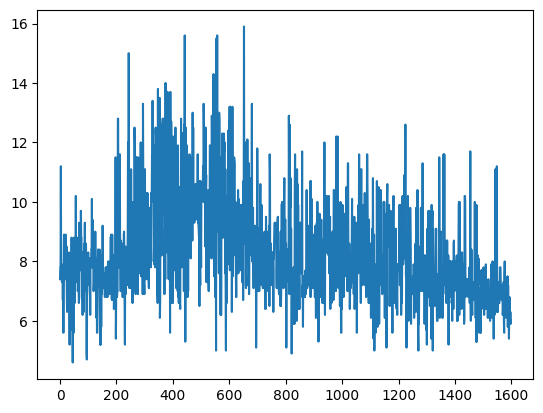

In [4]:
# We perform various visualizations :
# a) Univariate Analysis

# --------------> Univariate Analysis of fixed acidity <----------------------
df['fixed acidity'].plot()

<Axes: ylabel='Frequency'>

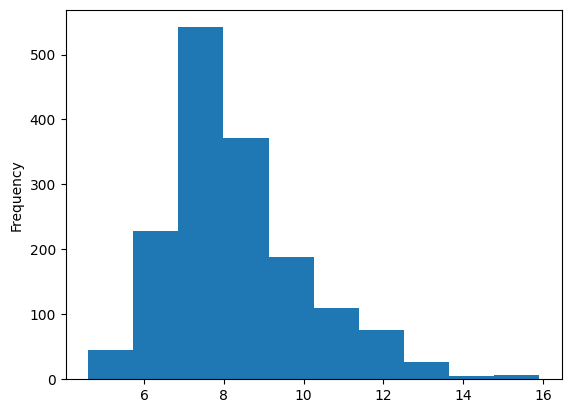

In [5]:
df['fixed acidity'].plot(kind = 'hist')

<Axes: >

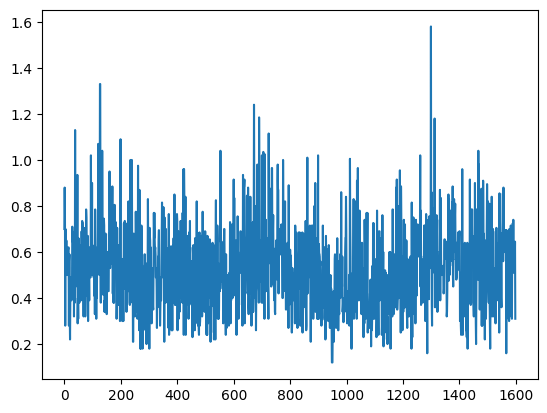

In [6]:
# --------------> Univariate Analysis of fixed acidity <----------------------
df['volatile acidity'].plot()

<Axes: ylabel='Frequency'>

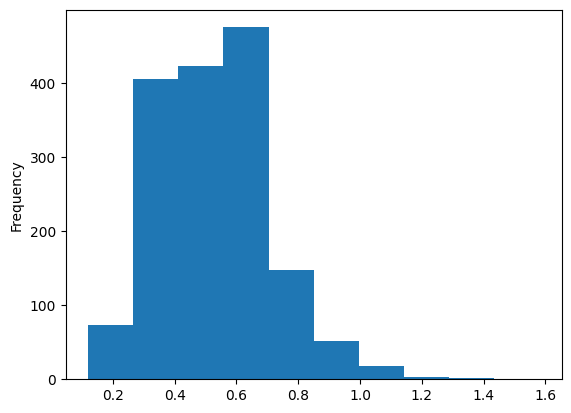

In [7]:
df['volatile acidity'].plot(kind = 'hist')

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

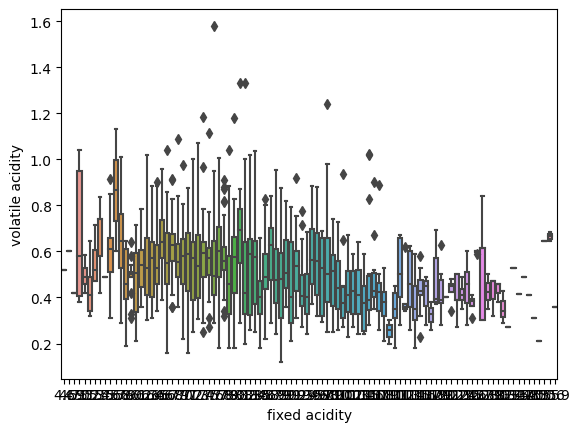

In [8]:
# b) Bi-Variate Analysis

# --> Bivariate Analysis of fixed acidity and volatile acidity <-----
sns.boxplot(data=df, x='fixed acidity', y='volatile acidity')

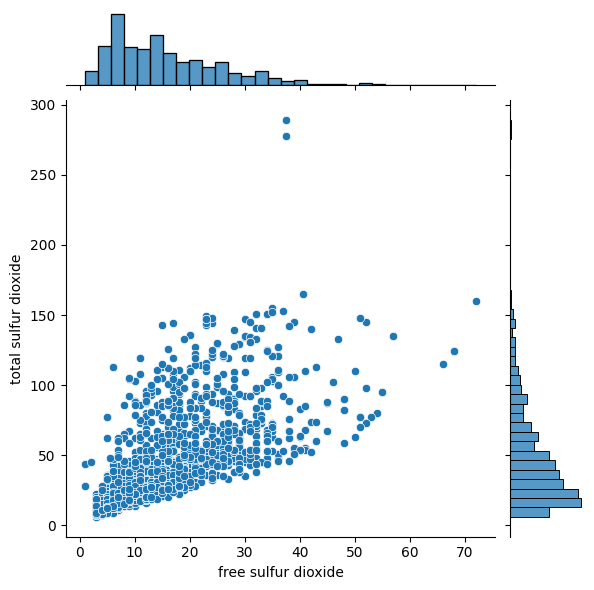

In [9]:
# --> Bivariate Analysis of free sulfur dioxide and total sulfur dioxide <-----
sns.jointplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide')

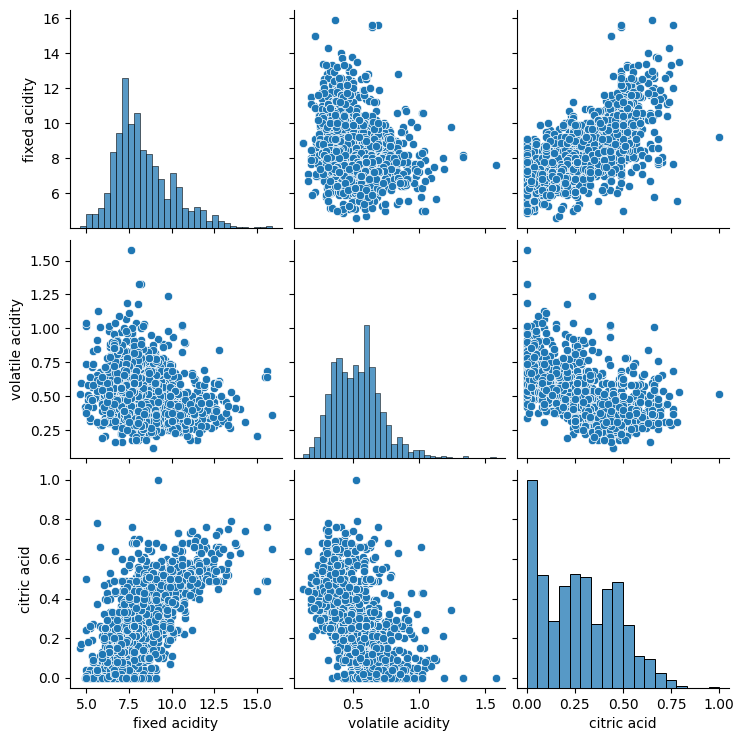

In [10]:
# c) Multi-Variate Analysis

sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid']])

<Axes: >

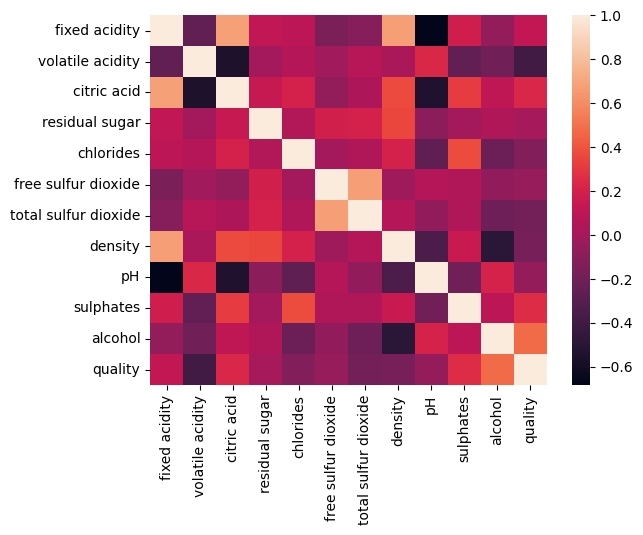

In [11]:
sns.heatmap(df.corr())

In [12]:
#Perform descriptive statistics on the dataset.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
#Handle the missing values
#We handle the missing values by inserting the mean value of the respective columns in that missing vlaues

#Step 1: Identify which columns have missing values and how many in each column:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


As we can see there are no missing values in the given dataset

In [14]:
#Find the outliers and replace them outliers
print("Old Shape: ", df.shape)

# IQR
# Calculate the upper and lower limits

Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['fixed acidity']>=upper)[0]
lower_array = np.where(df['fixed acidity']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (1599, 12)
New Shape:  (1550, 12)


In [15]:
print("Old Shape: ", df.shape)

# IQR
# Calculate the upper and lower limits

Q1 = df['volatile acidity'].quantile(0.25)
Q3 = df['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['volatile acidity']>=upper)[0]
lower_array = np.where(df['volatile acidity']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (1550, 12)
New Shape:  (1530, 12)


In [16]:
print("Old Shape: ", df.shape)

# IQR
# Calculate the upper and lower limits

Q1 = df['citric acid'].quantile(0.25)
Q3 = df['citric acid'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['citric acid']>=upper)[0]
lower_array = np.where(df['citric acid']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (1530, 12)
New Shape:  (1529, 12)


Thus we have successfully identified and removes the outliers from some of the columns.

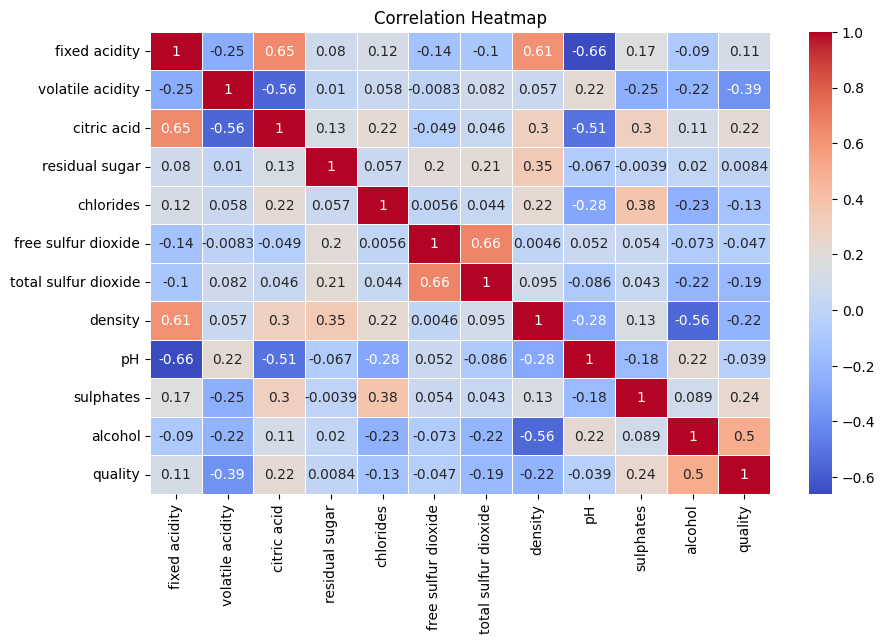

In [17]:
#Check the correlation of independent variables with the target
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#Check for Categorical columns and perform encoding.

#There are no Categorical Columns in our dataset.

In [19]:
# Split the data into dependent and independent variables
X =df.iloc[:,:-1] # Independent variables (features)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
#Check the shape of X
print("Shape of X (features):", X.shape)

Shape of X (features): (1529, 11)


In [21]:
y =df['quality'] # Dependent variable (target)
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [22]:
# Check the shape of y

print("Shape of y (target):", y.shape)

Shape of y (target): (1529,)


In [23]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1223, 11)
Shape of X_test: (306, 11)
Shape of y_train: (1223,)
Shape of y_test: (306,)


## Task 3: Machine Learning Model building

## The Machine Learning model that we are going to use on this is : **DECISION TREE CLASSIFIER**

---



In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model1 = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [26]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
d_y_predict = model1.predict(X_test)
d_y_predict

array([6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 4, 5, 6, 5, 7, 5, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 7, 5, 6, 4, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 4, 6, 6, 5, 7, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 7, 5, 6, 5, 7, 5, 5, 6, 5, 6, 6, 5, 7, 7, 6, 6, 6, 7, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 4, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 7,
       6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 7, 6, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5,

In [30]:
d_y_predict_train = model1.predict(X_train)
d_y_predict_train

array([6, 6, 5, ..., 6, 5, 6])

## Task 4 : Evaluating DTC

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
print('Testing Accuracy = ', accuracy_score(y_test,d_y_predict))
print('Training Accuracy = ', accuracy_score(y_train,d_y_predict_train))

Testing Accuracy =  0.5718954248366013
Training Accuracy =  0.6214227309893704


In [33]:
pd.crosstab(y_test,d_y_predict)

col_0,4,5,6,7
quality,,,,
3,1,0,0,0
4,0,4,2,0
5,1,71,48,0
6,2,31,91,4
7,0,1,33,13
8,0,0,3,1


In [34]:
print(classification_report(y_test,d_y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.66      0.59      0.63       120
           6       0.51      0.71      0.60       128
           7       0.72      0.28      0.40        47
           8       0.00      0.00      0.00         4

    accuracy                           0.57       306
   macro avg       0.32      0.26      0.27       306
weighted avg       0.59      0.57      0.56       306



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

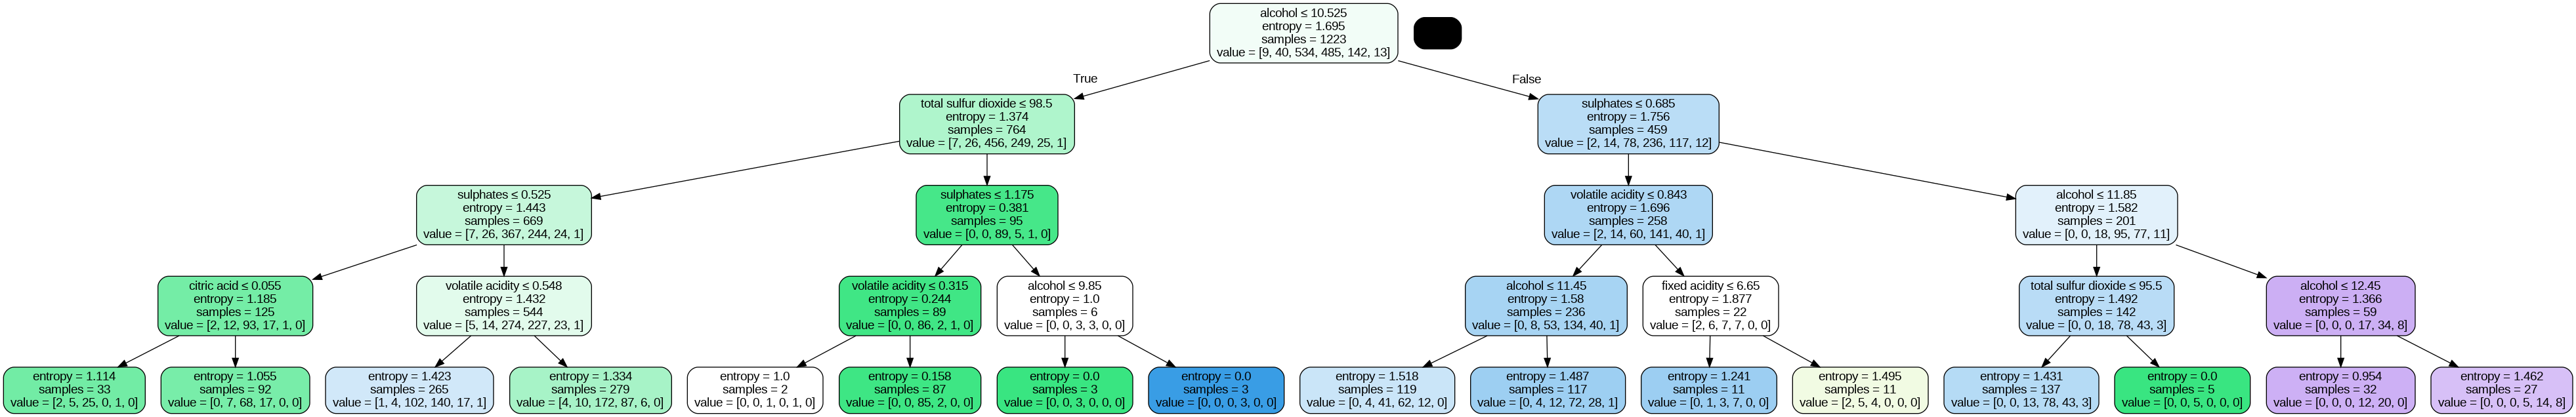

In [37]:
dot_data =StringIO()
export_graphviz(model1,out_file=dot_data,feature_names= X.columns,
                filled=True,rounded= True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Task 5: Test with random observation

In [38]:
model1.predict([[6.7,0.75,0.12,2,0.086,12,80,0.9958,3.38,0.52,10.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5])

As we can see the quality we got is 5, which matches with our data

In [39]:
model1.predict([[6.5,0.69,0.13,2,0.096,14,90,0.9858,3.18,0.42,9.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5])

Here we have again taken a random value and the quality we have obtained is 5

## Now we will train another Machine Learning model that we are going to use on this data and it is : **RANDOM FOREST CLASSIFIER**

---


### Task 3 (Part -2) : Model Building

In [40]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(criterion='entropy')

In [41]:
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

### Task 4(Part - 2) : Evaluating Ramdon Forest Classifier

In [43]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(X_train)

In [44]:
print('Testing Accuracy = ', accuracy_score(y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(y_train,r_y_predict_train))

Testing Accuracy =  0.6764705882352942
Training Accuracy =  1.0


In [45]:
pd.crosstab(y_test,r_y_predict)

col_0,5,6,7
quality,,,
3,1,0,0
4,5,1,0
5,94,25,1
6,35,89,4
7,0,23,24
8,0,4,0


## Task 5 (Part - 2): Test with random observation

In [47]:
model2.predict([[6.7,0.75,0.12,2,0.086,12,80,0.9958,3.38,0.52,10.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])

As we can see the quality we got is 5, which matches with our data

In [48]:
model2.predict([[8,0.59,0.16,1.8,0.065,3,16,0.9962,3.42,0.92,10.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([6])

Here we have again taken a random value and the quality we have obtained is 6

## Hence we have finished with all the tasks for the Assignment-4.

# Thank You 🙂